In [3]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 38.3 MB/s eta 0:00:00


In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [5]:
food_type = ctrl.Antecedent(np.arange(0, 11, 1), 'food_type')
food_weight = ctrl.Antecedent(np.arange(0, 1001, 1), 'food_weight')
initial_temp = ctrl.Antecedent(np.arange(0, 61, 1), 'initial_temp')
water_content = ctrl.Antecedent(np.arange(0, 11, 1), 'water_content')
cooking_time = ctrl.Consequent(np.arange(0, 61, 1), 'cooking_time')
heat_level = ctrl.Consequent(np.arange(0, 101, 1), 'heat_level')

In [6]:

food_type['soft'] = fuzz.trimf(food_type.universe, [0, 0, 5])
food_type['medium'] = fuzz.trimf(food_type.universe, [0, 5, 10])
food_type['hard'] = fuzz.trimf(food_type.universe, [5, 10, 10])

food_weight['light'] = fuzz.trimf(food_weight.universe, [0, 0, 400])
food_weight['medium'] = fuzz.trimf(food_weight.universe, [200, 500, 800])
food_weight['heavy'] = fuzz.trimf(food_weight.universe, [600, 1000, 1000])


initial_temp['cold'] = fuzz.trimf(initial_temp.universe, [0, 0, 10])
initial_temp['warm'] = fuzz.trimf(initial_temp.universe, [10, 20, 30])
initial_temp['hot'] = fuzz.trimf(initial_temp.universe, [30, 60, 60])


water_content['low'] = fuzz.trimf(water_content.universe, [0, 0, 5])
water_content['medium'] = fuzz.trimf(water_content.universe, [0, 5, 10])
water_content['high'] = fuzz.trimf(water_content.universe, [5, 10, 10])


cooking_time['short'] = fuzz.trimf(cooking_time.universe, [0, 0, 20])
cooking_time['medium'] = fuzz.trimf(cooking_time.universe, [15, 30, 45])
cooking_time['long'] = fuzz.trimf(cooking_time.universe, [40, 60, 60])

heat_level['low'] = fuzz.trimf(heat_level.universe, [0, 0, 40])
heat_level['medium'] = fuzz.trimf(heat_level.universe, [30, 60, 80])
heat_level['high'] = fuzz.trimf(heat_level.universe, [70, 100, 100])


<Figure size 1000x300 with 0 Axes>

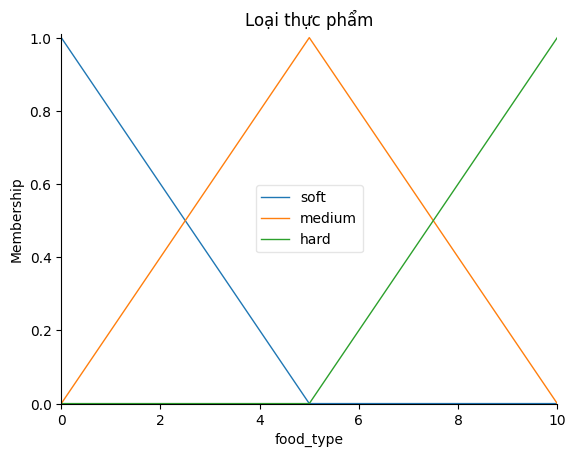

<Figure size 1000x300 with 0 Axes>

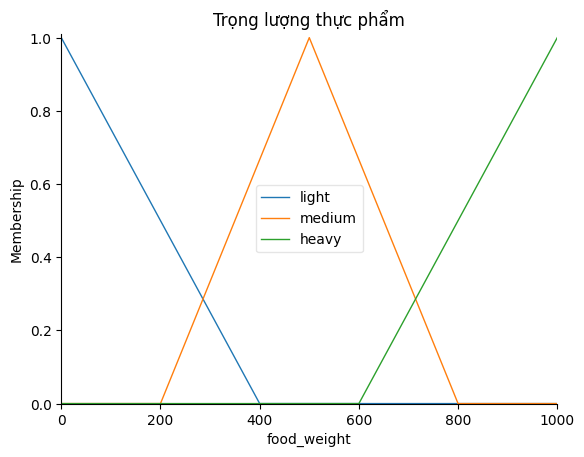

<Figure size 1000x300 with 0 Axes>

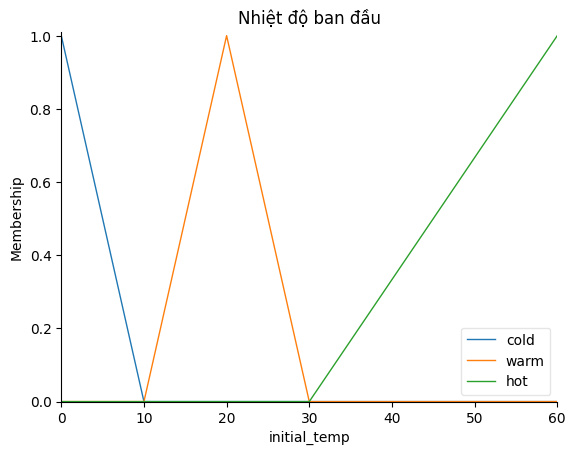

<Figure size 1000x300 with 0 Axes>

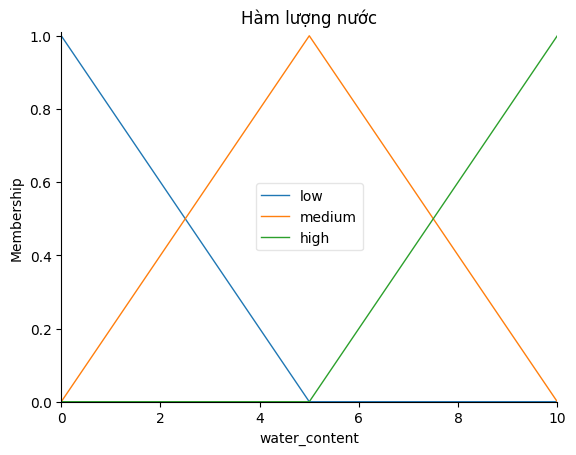

In [7]:

plt.figure(figsize=(10, 3))
food_type.view()
plt.title('Loại thực phẩm')

plt.figure(figsize=(10, 3))
food_weight.view()
plt.title('Trọng lượng thực phẩm')

plt.figure(figsize=(10, 3))
initial_temp.view()
plt.title('Nhiệt độ ban đầu')

plt.figure(figsize=(10, 3))
water_content.view()
plt.title('Hàm lượng nước')

plt.show()

In [8]:
rule1 = ctrl.Rule(food_weight['light'], cooking_time['short'])
rule2 = ctrl.Rule(food_weight['medium'], cooking_time['medium'])
rule3 = ctrl.Rule(food_weight['heavy'], cooking_time['long'])

rule4 = ctrl.Rule(food_type['soft'], heat_level['low'])
rule5 = ctrl.Rule(food_type['medium'], heat_level['medium'])
rule6 = ctrl.Rule(food_type['hard'], heat_level['high'])

rule7 = ctrl.Rule(initial_temp['cold'], cooking_time['long'])
rule8 = ctrl.Rule(initial_temp['warm'], cooking_time['medium'])
rule9 = ctrl.Rule(initial_temp['hot'], cooking_time['short'])

rule10 = ctrl.Rule(water_content['low'], heat_level['high'])
rule11 = ctrl.Rule(water_content['medium'], heat_level['medium'])
rule12 = ctrl.Rule(water_content['high'], heat_level['low'])

In [9]:
cooker_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,
                                  rule7, rule8, rule9, rule10, rule11, rule12])
cooker = ctrl.ControlSystemSimulation(cooker_ctrl)

Thời gian nấu: 40.5 phút
Mức nhiệt: 67.5%


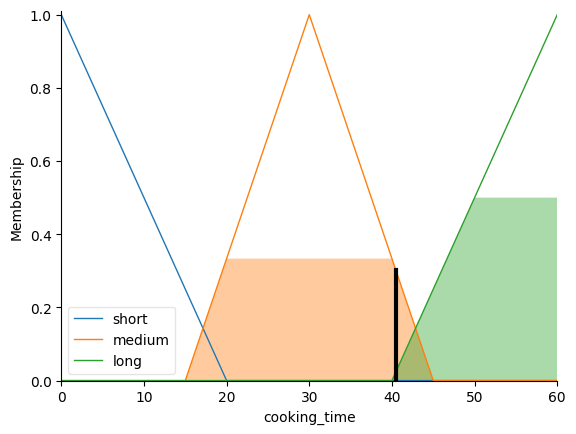

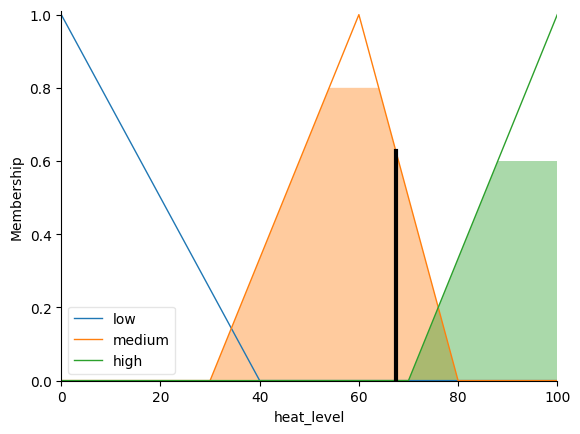

In [10]:
cooker.input['food_type'] = 8
cooker.input['food_weight'] = 700
cooker.input['initial_temp'] = 5
cooker.input['water_content'] = 4

cooker.compute()

print(f"Thời gian nấu: {cooker.output['cooking_time']:.1f} phút")
print(f"Mức nhiệt: {cooker.output['heat_level']:.1f}%")

cooking_time.view(sim=cooker)
heat_level.view(sim=cooker)

